In [1]:
%matplotlib inline

In [2]:
#IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
#import dataset and load in dataframe
data=pd.read_csv('/content/chronickidneydisease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [29]:
#dataset adjustment
data['classification']=data['classification'].replace(['ckd\t'],['notckd'])

In [30]:
data['classification'].value_counts()


ckd       248
notckd    152
Name: classification, dtype: int64

In [31]:
#checking the description and gathering the information about the dataset
data.describe().T


,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [33]:
#counting for the null values
data.isna().sum()


id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [34]:
#replacing the null values with median and mode
oc=[]#object data type columns
ic=[]#int type columns
for i in data.columns:
  if(data[i].dtype=='object'):
    oc.append(i)
else:
  ic.append(i)
print("ic\t",ic,"\noc\t",oc)


ic	 ['classification'] 
oc	 ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [35]:
#replacing the null with median
for i in ic:
  if(data[i].isna().any()==True):
    data[i]=data[i].fillna(data[i].median())
#checking
print("Attribute "+i+"\t",data[i].isna().sum())

Attribute classification	 0


In [36]:
#replacing the null with mode
for i in oc:
  if(data[i].isna().any()==True):
    data[i]=data[i].fillna(data[i].mode()[0])
#checking
print("Attribute: "+i+"\t\t\t",data[i].isna().sum())

Attribute: classification			 0


In [37]:
data.isna().sum().sum()

470

In [39]:
#encoding labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()#label encoder object
for i in oc:
  data[i]=le.fit_transform(data[i])#label encoding all the object dtypes
data.head(3)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,1,1,0,0,...,32,72,34,1,4,1,0,0,0,0
1,1,7.0,50.0,1.02,4.0,0.0,1,1,0,0,...,26,56,34,0,3,1,0,0,0,0
2,2,62.0,80.0,1.01,2.0,3.0,1,1,0,0,...,19,70,34,0,4,1,1,0,1,0


(array([10., 11., 20., 39., 44., 71., 90., 75., 28.,  3.]),
 array([ 2. , 10.8, 19.6, 28.4, 37.2, 46. , 54.8, 63.6, 72.4, 81.2, 90. ]),
 <a list of 10 Patch objects>)

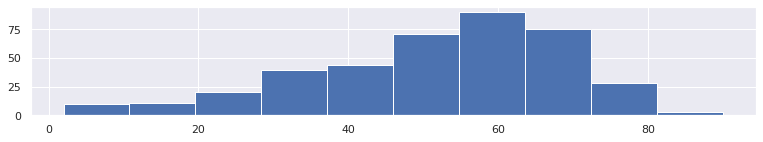

In [40]:
plt.hist(data['age'])

(array([ 76., 112., 116.,  78.,   3.,   1.,   1.,   0.,   0.,   1.]),
 array([ 50.,  63.,  76.,  89., 102., 115., 128., 141., 154., 167., 180.]),
 <a list of 10 Patch objects>)

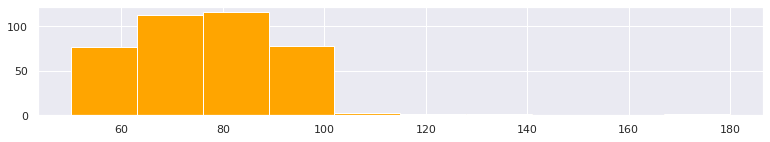

In [41]:
plt.hist(data['bp'],color="orange")

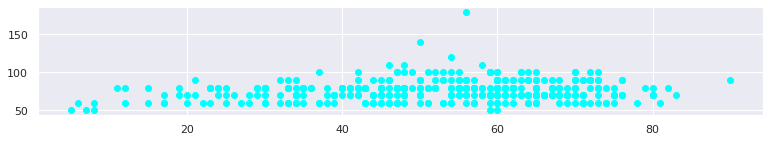

In [42]:
plt.scatter(data['age'],data['bp'],color="cyan")

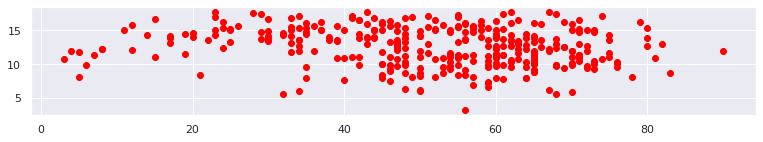

In [43]:
plt.scatter(data['age'],data['hemo'],color='red')

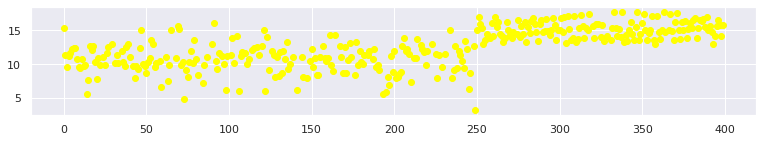

In [44]:
plt.scatter(data['id'],data['hemo'],color="yellow")

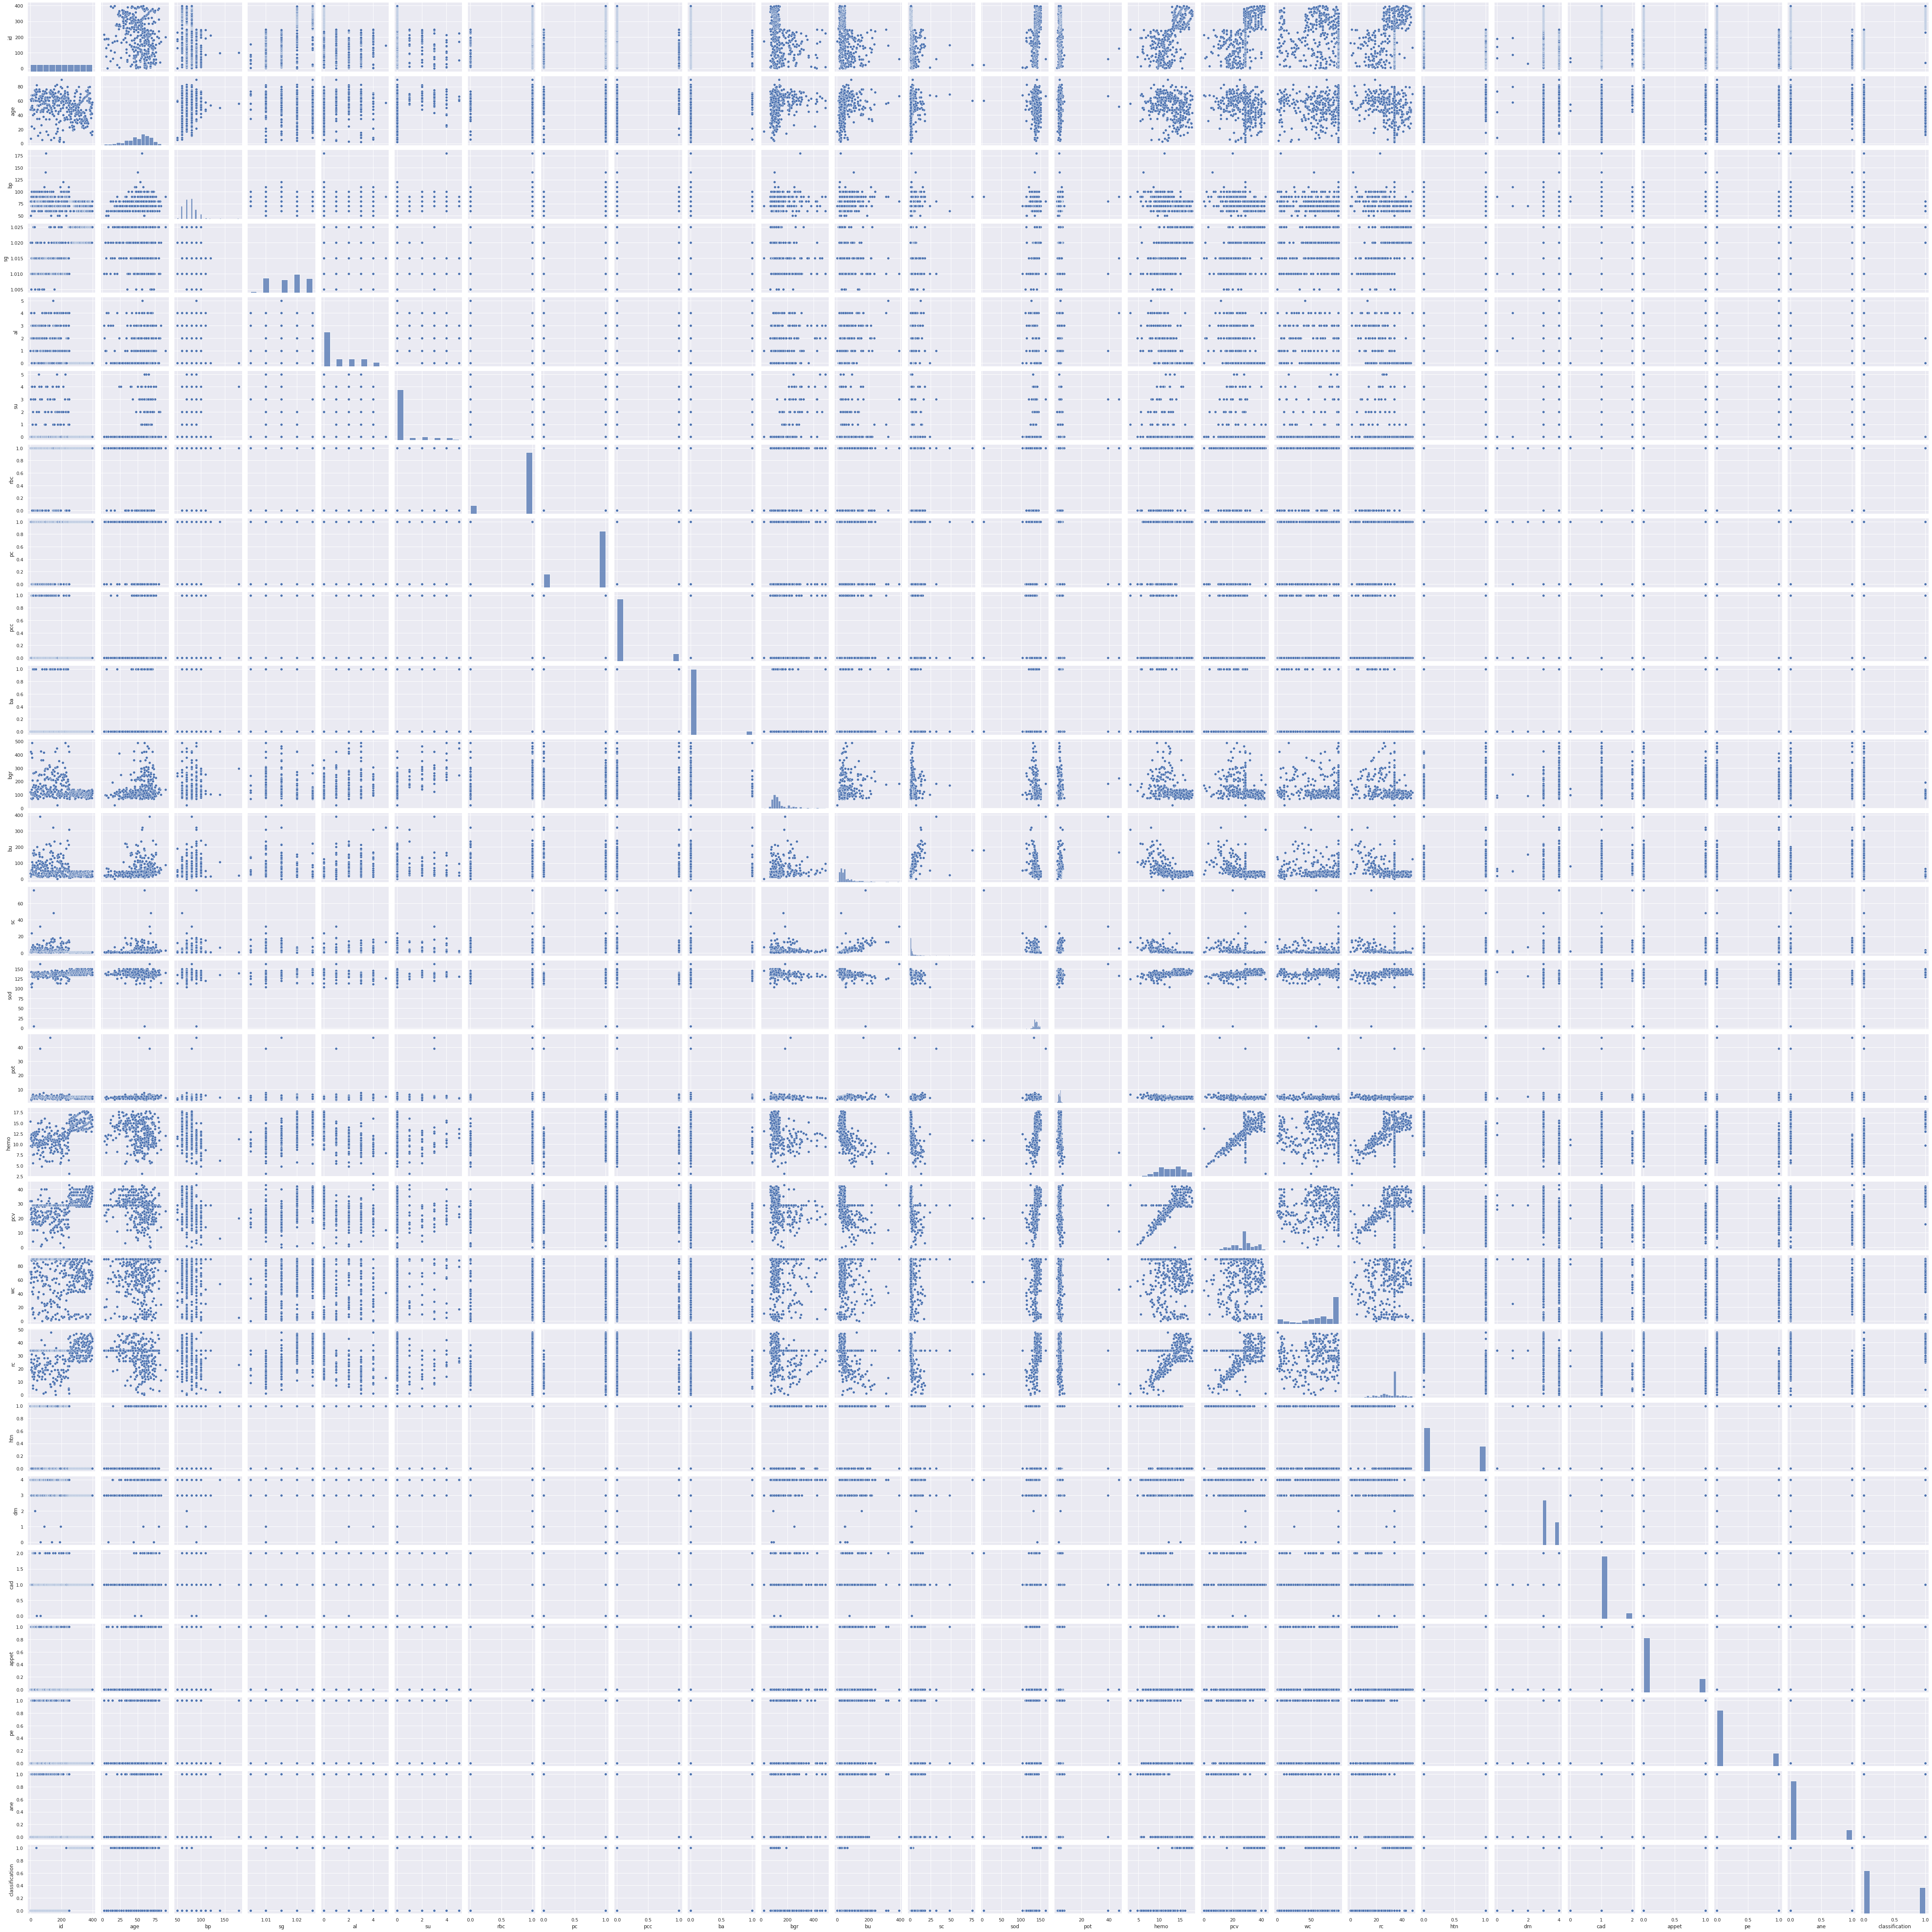

In [45]:
sns.set(rc={'figure.figsize':(13,2)})
sns.pairplot(data)